## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [24]:
train[0][0, :, :, :].astype(int)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [25]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x.astype(int)
    for i in range(len(x)):
        r_min = x[i, :, :, 0].min(); r_max = x[i, :, :, 0].max(); r_range = r_max - r_min
        g_min = x[i, :, :, 1].min(); g_max = x[i, :, :, 1].max(); g_range = g_max - g_min
        b_min = x[i, :, :, 2].min(); b_max = x[i, :, :, 2].max(); b_range = b_max - b_min
        
        x[i, :, :, 0] = (x[i, :, :, 0]-r_min)/r_range
        x[i, :, :, 1] = (x[i, :, :, 1]-g_min)/g_range
        x[i, :, :, 2] = (x[i, :, :, 2]-b_min)/b_range
        
        x[i, :, :, :] = x[i, :, :, :]*2 - 1
    
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [26]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
x_train.shape[1:]

(3072,)

In [33]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 512, 256, 256, 128, 128])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidd

In [34]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [35]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [36]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 430us/step - loss: 2.3093 - acc: 0.1082 - val_loss: 2.2864 - val_acc: 0.1034
Epoch 2/100
50000/50000 [==============================] - 19s 379us/step - loss: 2.2857 - acc: 0.1171 - val_loss: 2.2907 - val_acc: 0.1050. - ETA: 10s - loss: 2.2856 - ac - ETA: 9s - loss: 2.2859 - acc: 0 - ETA: 8s - loss: 2.2857 - acc: - - ETA:  - ETA: 2s -
Epoch 3/100
50000/50000 [==============================] - 19s 382us/step - loss: 2.2885 - acc: 0.1116 - val_loss: 2.2828 - val_acc: 0.1284
Epoch 4/100
50000/50000 [==============================] - 19s 380us/step - loss: 2.2785 - acc: 0.1148 - val_loss: 2.2788 - val_acc: 0.1179
Epoch 5/100
50000/50000 [==============================] - 20s 395us/step - loss: 2.2710 - acc: 0.1214 - val_loss: 2.2770 - val_acc: 0.1203
Epoch 6/100
50000/50000 [==============================] - 16s 329us/step - loss: 

Epoch 56/100
50000/50000 [==============================] - 15s 291us/step - loss: 2.2283 - acc: 0.1340 - val_loss: 2.3207 - val_acc: 0.1199
Epoch 57/100
50000/50000 [==============================] - 14s 290us/step - loss: 2.2333 - acc: 0.1339 - val_loss: 2.3176 - val_acc: 0.1151
Epoch 58/100
50000/50000 [==============================] - 14s 289us/step - loss: 2.2416 - acc: 0.1309 - val_loss: 2.3100 - val_acc: 0.1159
Epoch 59/100
50000/50000 [==============================] - 15s 291us/step - loss: 2.2302 - acc: 0.1349 - val_loss: 2.3079 - val_acc: 0.1292
Epoch 60/100
50000/50000 [==============================] - 15s 292us/step - loss: 2.2273 - acc: 0.1383 - val_loss: 2.2999 - val_acc: 0.1258
Epoch 61/100
50000/50000 [==============================] - 14s 289us/step - loss: 2.2273 - acc: 0.1371 - val_loss: 2.3122 - val_acc: 0.1265
Epoch 62/100
50000/50000 [==============================] - 15s 290us/step - loss: 2.2095 - acc: 0.1485 - val_loss: 2.2945 - val_acc: 0.1490
Epoch 63/100


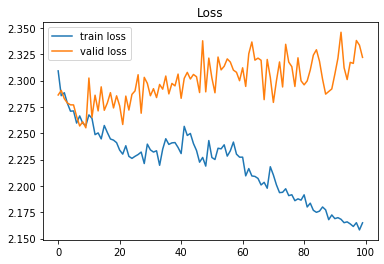

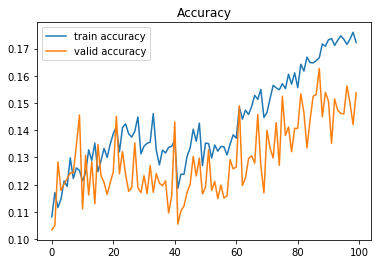

In [38]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()